In [9]:
import pickle
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
import pandas as pd
import seaborn as sns
import scikitplot as skplt
from sklearn.decomposition import PCA
from pprint import pprint
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, r2_score
from heapq import heappush, heappop
import sys

# Split Data 

In [3]:
def SplitTestTrain(X, Y,percent = 0.8):
    mask = np.random.rand(len(X))<percent
    X_train = X[mask].dropna()
    X_test  = X[~mask].dropna()
    Y_train = Y[mask].dropna()
    Y_test  = Y[~mask].dropna()
    #print(X_train.shape, X_test.shape)
    X_train = X_train.reset_index(drop = True)
    X_test  = X_test.reset_index(drop = True)
    Y_train = Y_train.reset_index(drop = True)
    Y_test  = Y_test.reset_index(drop = True)
    return X_train.values, X_test.values, Y_train.values ,Y_test.values


# Standardize Data

In [4]:


def standardize(X):
    X_standardized = (X - X.mean()) /X.std()
    return X_standardized


# PCA 
# for preprocessing standardization and PCA has been used so that operation can be more accurate and efficient

In [5]:


def pcaProcessing(X_data):
    pca = PCA(n_components = 50)
    pca.fit(X_data)
    X_data = pca.transform(X_data)
    return X_data

# Unpickle File

In [6]:

def Unpickle(data_batch):
    with open(data_batch,'rb') as fo:
        dic = pickle.load(fo,encoding = 'bytes')
    labels = np.asarray(dic[b'labels'])
    labels = np.reshape(labels,(-1,1))
    train_data = dic[b'data']
    #print(train_data)
    #print(train_data[:,0])
    #print('labels ',labels)
    #train_data = np.hstack((train_data,labels))
    #print(train_data.shape)
    train_data = pd.DataFrame(train_data)
    train_data = standardize(train_data)
    labels = pd.DataFrame(labels)
    #print(train_data)
    return train_data,labels
        

X,Y = Unpickle('data_batch_1')
X = pcaProcessing(X)
X =pd.DataFrame(X)
X_train, X_test, Y_train ,Y_test = SplitTestTrain(X, Y,percent = 0.8)
print(type(Y_train))
svm_model_linear = SVC(kernel = 'linear', C = 1,decision_function_shape = 'ovr').fit(X_train, Y_train.flatten())
svm_predictions = svm_model_linear.predict(X_test)
accuracy = svm_model_linear.score(X_test, Y_test) 
cm = confusion_matrix(Y_test, svm_predictions) 
print(' f1 - score ', f1_score(Y_test,svm_predictions , average='macro'))
print(' accuracy  score ', accuracy)


<class 'numpy.ndarray'>
 f1 - score  0.3725412362894879
 accuracy  score  0.37680438028870084


# For C =1 Confusion_matrix 

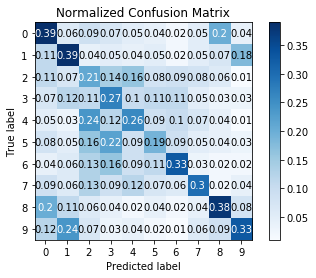

In [21]:
skplt.metrics.plot_confusion_matrix(Y_test, svm_predictions, normalize=True)
plt.show()

# DATA VISUALIZATION

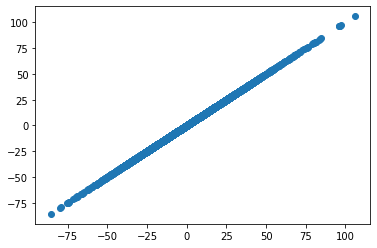

In [23]:

#print(X_test)
#print(Y_test)
plt.scatter(X_test,X_test)
plt.show()

# For C = 2

 f1 - score  0.31369780198131275
 accuracy  0.3141091658084449


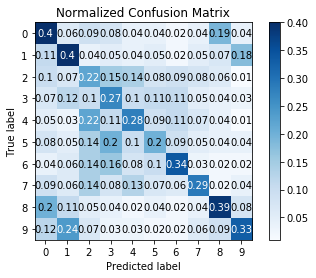

In [25]:
svm_model_linear = SVC(kernel = 'linear', C = 2,decision_function_shape = 'ovr').fit(X_train, Y_train.flatten())
svm_predictions = svm_model_linear.predict(X_test)
accuracy = svm_model_linear.score(X_test, Y_test) 
cm = confusion_matrix(Y_test, svm_predictions) 
print(' f1 - score ', f1_score(Y_test,svm_predictions , average='macro'))
print(' accuracy ', accuracy)
skplt.metrics.plot_confusion_matrix(Y_test, svm_predictions, normalize=True)
plt.show()


# For C = 5

 f1 - score  0.31104921777494676
 accuracy  0.31153450051493303


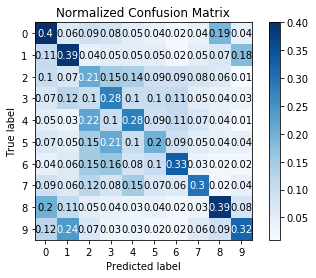

In [26]:
svm_model_linear = SVC(kernel = 'linear', C = 5,decision_function_shape = 'ovr').fit(X_train, Y_train.flatten())
svm_predictions = svm_model_linear.predict(X_test)
accuracy = svm_model_linear.score(X_test, Y_test) 
cm = confusion_matrix(Y_test, svm_predictions) 
print(' f1 - score ', f1_score(Y_test,svm_predictions , average='macro'))
print(' accuracy ', accuracy)
skplt.metrics.plot_confusion_matrix(Y_test, svm_predictions, normalize=True)

# For  C = 100

 f1 - score  0.31104921777494676
 accuracy  0.31153450051493303


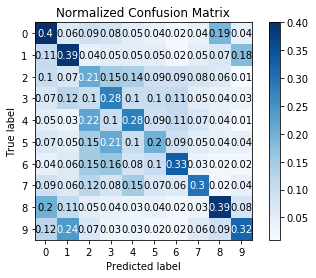

In [27]:
svm_model_linear = SVC(kernel = 'linear', C = 100,decision_function_shape = 'ovr').fit(X_train, Y_train.flatten())
svm_predictions = svm_model_linear.predict(X_test)
accuracy = svm_model_linear.score(X_test, Y_test) 
cm = confusion_matrix(Y_test, svm_predictions) 
print(' f1 - score ', f1_score(Y_test,svm_predictions , average='macro'))
print(' accuracy ', accuracy)
skplt.metrics.plot_confusion_matrix(Y_test, svm_predictions, normalize=True)

# For All Five Files

In [ ]:
X1,Y1 = Unpickle('data_batch_1')
X2,Y2 = Unpickle('data_batch_2')
X3,Y3 = Unpickle('data_batch_3')
X4,Y4 = Unpickle('data_batch_4')
X5,Y5 = Unpickle('data_batch_5')
X = np.vstack((X1,X2,X3,X4,X5))
Y = np.vstack((Y1,Y2,Y3,Y4,Y5))
X = pcaProcessing(X)
X =pd.DataFrame(X)
Y = pd.DataFrame(Y)
X_train, X_test, Y_train ,Y_test = SplitTestTrain(X, Y,percent = 0.8)
print(type(Y_train))
svm_model_linear = SVC(kernel = 'linear', C = 1,decision_function_shape = 'ovr').fit(X_train, Y_train.flatten())
svm_predictions = svm_model_linear.predict(X_test)
accuracy = svm_model_linear.score(X_test, Y_test) 
cm = confusion_matrix(Y_test, svm_predictions) 
print(' f1 - score ', f1_score(Y_test,svm_predictions , average='macro'))
print(' accuracy  score ', accuracy)



# Scores and confusion matrix 

 f1 - score  0.3725412362894879
 accuracy  0.37680438028870084


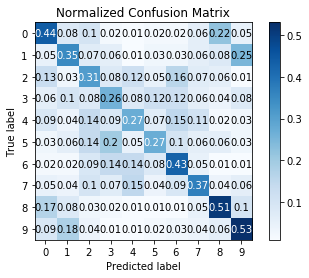

In [7]:
print(' f1 - score ', f1_score(Y_test,svm_predictions , average='macro'))
print(' accuracy ', accuracy)
skplt.metrics.plot_confusion_matrix(Y_test, svm_predictions, normalize=True)

# Graph Between C and accuracy

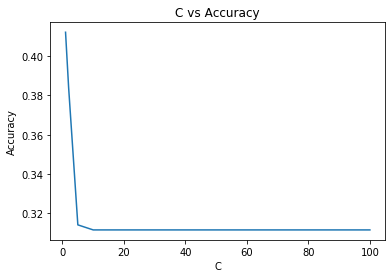

In [10]:
C = [1,2,5,10,100]
acc = [ 0.4122 ,0.3841091658084449,0.3141091658084449,0.31153450051493303,0.31153450051493303]
plt.plot(C,acc)
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title('C vs Accuracy')
plt.show()

# Printing support vector 

In [28]:
from sklearn.svm import SVC
clf = SVC(gamma='auto',kernel='linear',max_iter=3000,C=0.001)
clf.fit(train,Actual_label_train)
# print(clf.predict(test))
predicted_label=clf.predict(test)
print("predicted label ",predicted_label)
support_vectors = clf.support_vectors_
print("support_vectors ",support_vectors)
Accu_score = accuracy_score(Actual_label_test,predicted_label)
print("Accuracy score",Accu_score)
support_vec = clf.support_vectors_
print(support_vec)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler % self.max_iter, ConvergenceWarning)
predicted label  [9 6 9 ... 7 8 0]
support_vectors  [[ -4.99397755  -0.20067403   0.29192886 ...  -0.39754556  -0.11983276
0.21741904]
[ 58.60529185   5.28028874 -12.87628793 ...   1.13668114  -0.89024523
  -0.25246467]
 [ 49.61817396  14.19130479 -34.6146457  ...   0.98898549   0.8804073
 7.13557781]
 ...[ 21.54094994   0.27823047 -22.05176133 ...  -1.9112813   -3.44838956
0.24411458]
[ 58.60529185   5.28028874 -12.87628793 ...   1.13668114  -0.89024523
  -0.25246467]
 [ 49.61817396  14.19130479 -34.6146457  ...   0.98898549   0.8804073
 7.13557781]
Accuracy score 0.3644
[[ -4.99397755  -0.20067403   0.29192886 ...  -0.39754556  -0.11983276
0.21741904]
[[ -4.99397755  -0.20067403   0.29192886 ...  -0.39754556  -0.11983276
0.21741904]
[[ -4.99397755  -0.20

# Classification report

In [10]:
print('classification report')
print(classification_report(Y_test, svm_predictions))

classification report
              precision    recall  f1-score   support

           0       0.38      0.44      0.41       199
           1       0.35      0.35      0.35       192
           2       0.28      0.31      0.30       198
           3       0.28      0.27      0.27       200
           4       0.31      0.27      0.29       195
           5       0.36      0.27      0.31       187
           6       0.38      0.43      0.41       207
           7       0.43      0.37      0.40       227
           8       0.48      0.51      0.50       213
           9       0.45      0.53      0.49       191

    accuracy                           0.38      2009
   macro avg       0.37      0.38      0.37      2009
weighted avg       0.37      0.38      0.37      2009



# Classification using KNN

In [ ]:
test=test[:1000]
train=train[:4000]

In [ ]:
Actual_label_test=Actual_label_test[:1000]
Actual_label_train=Actual_label_train[:4000]

In [14]:
g=0
final_euclid=[]
for row in test:
    print(g,end=" ")
    g=g+1
    euclid=[]
    for i in range(0,len(train)):
        li=[]
        dis = np.linalg.norm(row - train[i])
        label = Actual_label_train[i]
        li.append(dis)
        li.append(label)
        euclid.append(li)
    euclid.sort()
    final_euclid.append(euclid)
# print(final_euclid)

accu_k=[]
predicted_label=[]
K=3
while(K<8):
    predicted_label=[]
    for row in final_euclid:
        euc=[]
        euc=row
        euc=row[0:K]
#         print("hiiii")
        li=[]
        for j in range(0,len(euc)):
#             print("hello")
            li.append(euc[j][1])
        try:
            modi=mode(li)
        except:
            modi=li[0]
        predicted_label.append(modi)
    accu_k_pair=[]
    print(len(Actual_label_test))
    print(len(predicted_label))
    accu_score= sklearn.metrics.accuracy_score(Actual_label_test,predicted_label, normalize=True, sample_weight=None)
    print(K)
    print(accu_score," accuracy score")
    print(f1_score(Actual_label_test, predicted_label, average=None)," f1 score")
    # print(K)
    print(confusion_matrix(Actual_label_test,predicted_label)," confusion matrix")
    # print("f1 score for K for euc ",K)
    # print("f1 score ",f1_score)
    accu_k_pair.append(accu_score)
    accu_k_pair.append(K)
    accu_k.append(accu_k_pair)
    K=K+2

accuracy_score : 0.26
f1_score:  [0.38793103, 0.29113924, 0.25514403, 0.11976048, 0.21428571, 0.1509434, 0.32599119, 0.24277457, 0.33183857, 0.27710843]
[45, 4, 6, 3, 10, 5, 3, 2, 14, 5]
[11, 23, 5, 3, 10, 6, 8, 6, 20, 14]
[6, 0, 31, 6, 22, 8, 16, 5, 5, 1]
[5, 3, 15, 10, 17, 16, 23, 5, 10, 1]
[10, 3, 25, 4, 27, 2, 7, 7, 7, 2]
[4, 1, 11, 16, 16, 12, 21, 3, 5, 2]
[1, 1, 17, 4, 17, 6, 37, 4, 2, 2]
[13, 3, 20, 5, 23, 7, 11, 21, 7, 3]
[23, 5, 8, 5, 7, 0, 3, 2, 37, 2]
[17, 9, 5, 6, 9, 6, 7, 5, 24, 23]
confusion matrix
accuracy_score : 0.26
f1_score:  [0.38793103, 0.29113924, 0.25514403, 0.11976048, 0.21428571, 0.1509434, 0.32599119, 0.24277457, 0.33183857, 0.27710843]
[45, 4, 6, 3, 10, 5, 3, 2, 14, 5]
[11, 23, 5, 3, 10, 6, 8, 6, 20, 14]
[6, 0, 31, 6, 22, 8, 16, 5, 5, 1]
[5, 3, 15, 10, 17, 16, 23, 5, 10, 1]
[10, 3, 25, 4, 27, 2, 7, 7, 7, 2]
[4, 1, 11, 16, 16, 12, 21, 3, 5, 2]
[1, 1, 17, 4, 17, 6, 37, 4, 2, 2]
[13, 3, 20, 5, 23, 7, 11, 21, 7, 3]
[23, 5, 8, 5, 7, 0, 3, 2, 37, 2]
[17, 9, 5, 6, 9

# significance of C

In [ ]:
Significance of C:
In support vector machines,our focus is mainly on getting large margin and lower missclassification
these two things depends on value of C
Keeping a margin low,leads to less missclassifcation in train dataset, however that may not be case in test set.
for Large Value of parameter C,there is small margin and for small value of parameter c,there will be large margin
choosing a value of C depends on dataset
for example when i incresed value of C ,accuracy decreased and when value of c is decreased accuracy increased